<a href="https://colab.research.google.com/github/bhartikapoor9634/Machine-Learning-Projects/blob/main/Comparison_of_Several_ML_algorithms_on_Wine_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing
 Libraries**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 17 kB/s 


In [ ]:
import numpy as nupy
import pandas as pnds

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix

**Import Dataset**

In [ ]:
wine_dataS = pnds.read_csv('winequality-red.csv')

wine_dataS.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


**Showing the data cloumns that are present in the dataset**

In [ ]:
wine_dataS.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
wine_dataS.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_dataS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [ ]:
wine_dataS.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_dataS['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# **Exploratory Data Analysis**

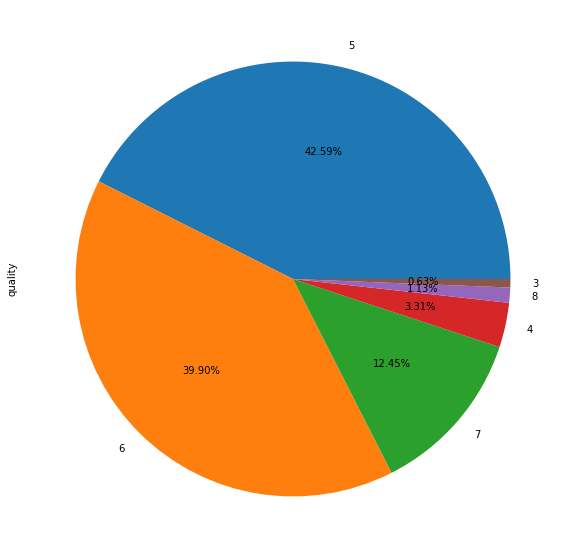

In [ ]:
plt.figure(1, figsize=(10,10))
wine_dataS['quality'].value_counts().plot.pie(autopct="%1.2f%%")

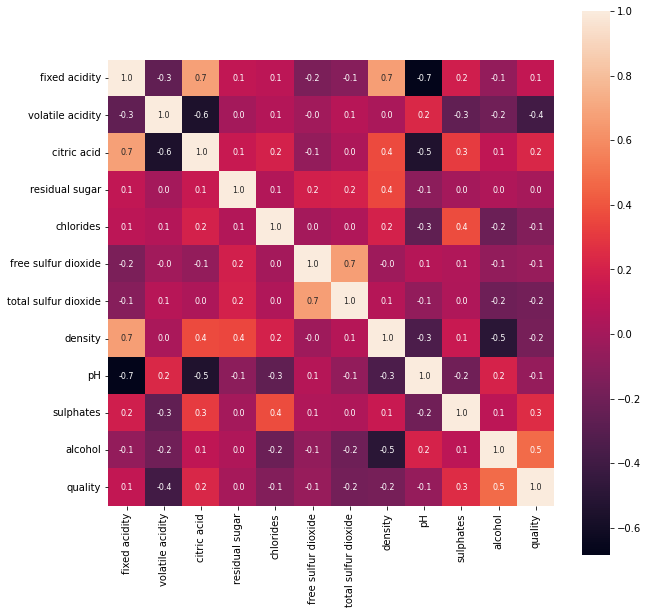

In [ ]:
#Checking Correlation among variables
plt.figure(figsize=(10,10))
sns.heatmap(wine_dataS.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8})

In [ ]:
#Displaying correlation Scores among variables
wine_dataS.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050554
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185112
volatile acidity       -0.390558
Name: quality, dtype: float64

In [ ]:
fig = px.violin(wine_dataS,x='quality',y='fixed acidity',title='Fixed Acidity vs Quality')
fig.show()

Observation: There is not much impact of Fixed Acidity on Quality of Wine.

In [ ]:
fig = px.violin(wine_dataS,x='quality',y='volatile acidity',title='Volatile Acidity vs Quality')
fig.show()

Observation: Quality of wine increases with decrease in Volatile Acidity Composition.

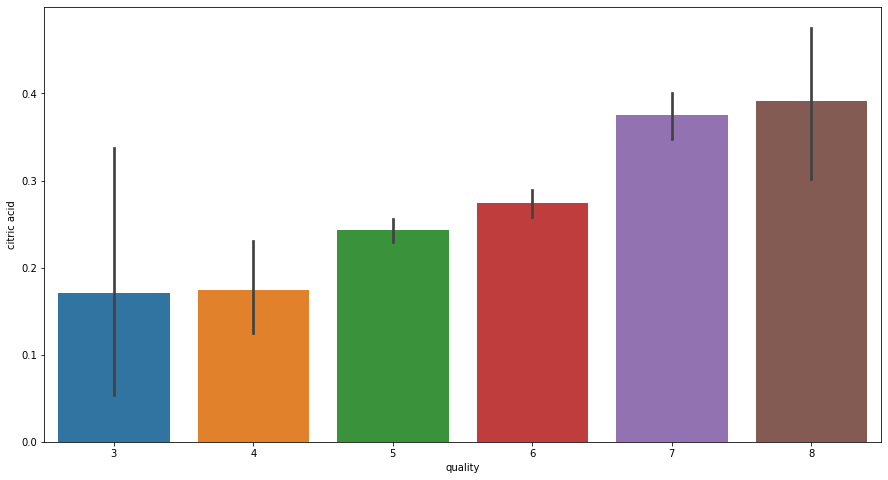

In [ ]:
fgr = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_dataS)

Observation: Quality of wine increases with increase in Citric Acid Composition.

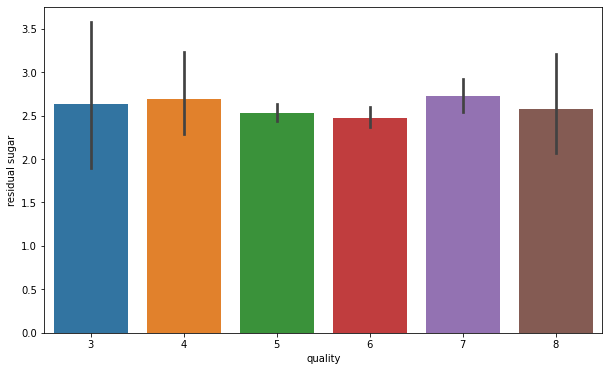

In [ ]:
fgr = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_dataS)

Observation: no impact of Residual Sugar on Wine Quality.

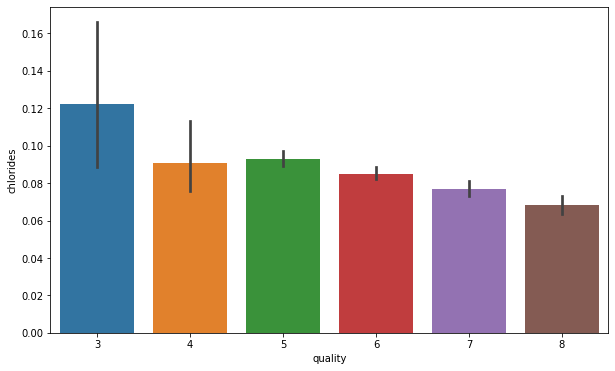

In [ ]:
fgr = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_dataS)

Observation: The quality of wine increases with the decrease in composition of Chlorides.

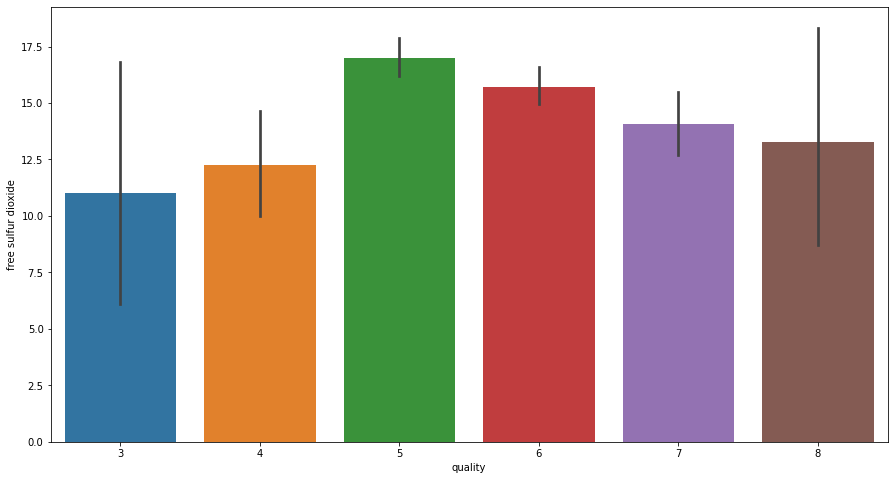

In [ ]:

fgr = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_dataS)

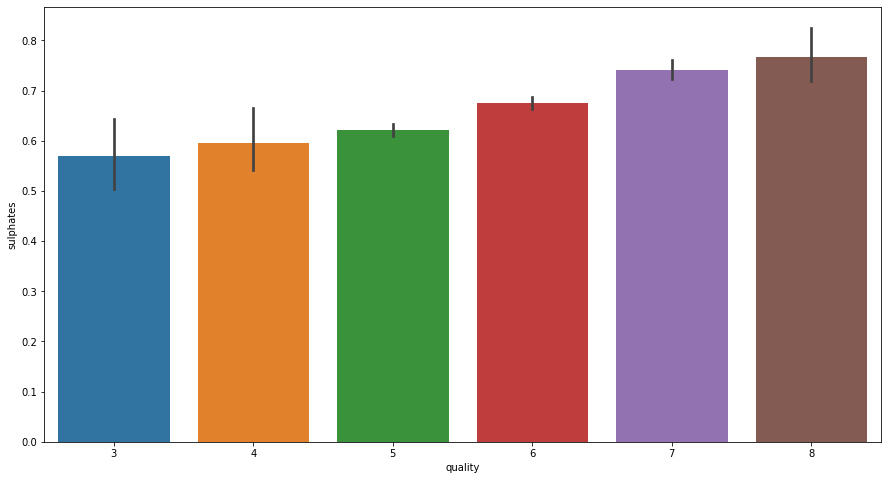

In [ ]:
#Sulphates levels rise as wine quality rises.

fgr = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_dataS)

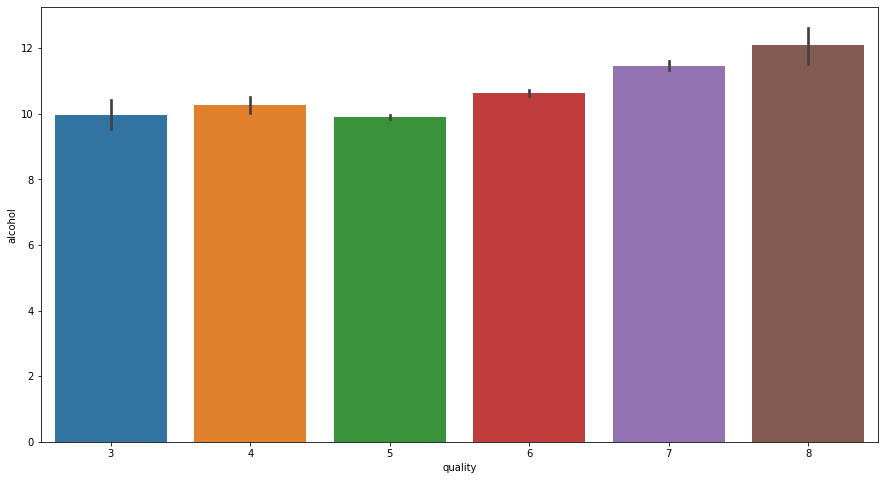

In [ ]:
fgr = plt.figure(figsize = (15,8))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_dataS)

Observation: Alcohol level goes higher with the quality of wine.

# **Data Wrangling**

In [ ]:
wine_dataS.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# transforming the dependent variable (3-7) to binary response variables (excellent or negative)
wine_dataS['quality'] = wine_dataS['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [ ]:
# examining the various values in the explanatory variables (quality column)
wine_dataS['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

Converting Categorical Columns into Numerical Columns

In [ ]:

labEnco = LabelEncoder()
wine_dataS['quality'] = labEnco.fit_transform(wine_dataS['quality'])


In [ ]:
wine_dataS['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



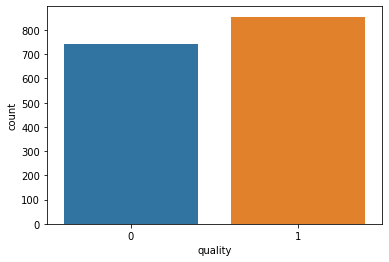

In [ ]:
sns.countplot(wine_dataS['quality'])

# **Forming Train-Test Split**

In [ ]:
# separating the variables in the data into variables of the study

X = wine_dataS.iloc[:,:11]
y = wine_dataS.iloc[:,11]

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [ ]:
# separating the dataset into a training and testing group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

# separating the dataset into a training and testing group
print(X_train.shape)
print(y_train .shape)
print(X_test .shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [ ]:
# Feature Scaling
stnSc = StandardScaler()
X_train = stnSc.fit_transform(X_train)
X_test  = stnSc.fit_transform(X_test)


# **Model Implementation**

**Logistic Regression**

In [ ]:
# model creation
lr_mdl = LogisticRegression()

# tranfer the group of traing data into modeling
lr_mdl.fit(X_train, y_train)

# test set predicting for the results
lr_pred = lr_mdl.predict(X_test)

# calculating both accuracies
print("Training accuracy :", lr_mdl.score(X_train, y_train ))
print("Testing accuracy :", lr_mdl.score(X_test , y_test))

# report of classification 
print(classification_report(y_test, lr_pred))

# confusion matrix
cm_lr= confusion_matrix(y_test, lr_pred)
print(cm_lr)


Training accuracy : 0.7472894078398665
Testing accuracy : 0.7225
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       204
           1       0.70      0.76      0.73       196

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

[[141  63]
 [ 48 148]]


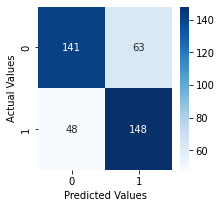

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_lr, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Decision Tree Classifier**

In [ ]:
dt_mdl = DecisionTreeClassifier()

dt_mdl.fit(X_train, y_train )

dt_pred = dt_mdl.predict(X_test)

print("Training accuracy :", dt_mdl.score(X_train, y_train ))
print("Testing accuracy :", dt_mdl.score(X_test, y_test))


# report of classification 
print(classification_report(y_test, dt_pred))

# confusion matrix
cm_dt= confusion_matrix(y_test, dt_pred)
print(cm_dt)

Training accuracy : 1.0
Testing accuracy : 0.74
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       204
           1       0.72      0.77      0.74       196

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

[[146  58]
 [ 46 150]]


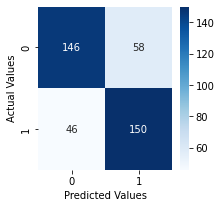

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_dt, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Random Forest Classifier**

In [ ]:
rf_mdl = RandomForestClassifier()

rf_mdl.fit(X_train, y_train )

rf_pred = rf_mdl.predict(X_test)

print("Training accuracy :", rf_mdl.score(X_train, y_train ))
print("Testing accuracy :", rf_mdl.score(X_test, y_test))


# report of classification 
print(classification_report(y_test, rf_pred))

# confusion matrix
cm_rf= confusion_matrix(y_test, rf_pred)
print(cm_rf)

Training accuracy : 1.0
Testing accuracy : 0.78
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       204
           1       0.75      0.82      0.79       196

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

[[151  53]
 [ 35 161]]


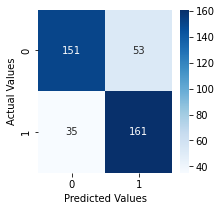

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_rf, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Extreme Gradient Boost Classifier**

Training accuracy : 0.8765638031693077
Testing accuracy : 0.755
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       204
           1       0.73      0.80      0.76       196

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.75       400
weighted avg       0.76      0.76      0.75       400

[[146  58]
 [ 40 156]]


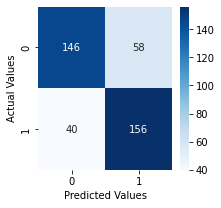

In [ ]:

xg_mdl= xgboost.XGBClassifier()
xg_mdl= xg_mdl.fit(X_train , y_train)

xg_pred = xg_mdl.predict(X_test) 

print("Training accuracy :", xg_mdl.score(X_train, y_train ))
print("Testing accuracy :", xg_mdl.score(X_test, y_test))


# report of classification 
print(classification_report(y_test, xg_pred))

# confusion matrix
cm_xg= confusion_matrix(y_test, xg_pred)
print(cm_xg)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_xg, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


# **Stochastic Gradient Descent Classifier**

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       204
           1       0.68      0.79      0.73       196

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

[[133  71]
 [ 42 154]]


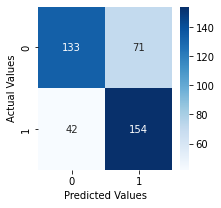

In [ ]:


# model creation
sgd_mdl = SGDClassifier(penalty=None)

# tranfer the group of traing data into modeling
sgd_mdl=sgd_mdl.fit(X_train, y_train)

# test set predicting for the results
sgd_pred = sgd_mdl.predict(X_test)

# report of classification
print(classification_report(y_test, sgd_pred))

# confusion matrix
cm_sgd= confusion_matrix(y_test, sgd_pred)
print(cm_sgd)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_sgd, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()



# **AdaBoost Classifier**

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       204
           1       0.71      0.80      0.75       196

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400

[[141  63]
 [ 40 156]]


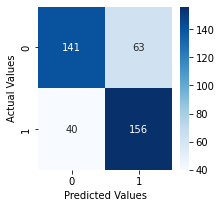

In [ ]:

# model creation
ab_mdl = AdaBoostClassifier()

# tranfer the group of traing data into modeling
ab_mdl=ab_mdl.fit(X_train, y_train)

# test set predicting for the results
ab_pred = ab_mdl.predict(X_test)

# report of classification
print(classification_report(y_test, ab_pred))

# confusion matrix
cm_ab= confusion_matrix(y_test, ab_pred)
print(cm_ab)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_ab, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **CatBoost Classifier**

Learning rate set to 0.011132
0:	learn: 0.6893069	total: 49.5ms	remaining: 49.4s
1:	learn: 0.6849842	total: 57.6ms	remaining: 28.7s
2:	learn: 0.6804974	total: 59.9ms	remaining: 19.9s
3:	learn: 0.6758203	total: 62ms	remaining: 15.4s
4:	learn: 0.6716009	total: 64.3ms	remaining: 12.8s
5:	learn: 0.6682624	total: 66.4ms	remaining: 11s
6:	learn: 0.6646211	total: 68.7ms	remaining: 9.74s
7:	learn: 0.6608926	total: 88.7ms	remaining: 11s
8:	learn: 0.6571477	total: 111ms	remaining: 12.2s
9:	learn: 0.6533163	total: 123ms	remaining: 12.2s
10:	learn: 0.6491222	total: 133ms	remaining: 12s
11:	learn: 0.6458091	total: 140ms	remaining: 11.5s
12:	learn: 0.6434309	total: 146ms	remaining: 11.1s
13:	learn: 0.6402515	total: 153ms	remaining: 10.8s
14:	learn: 0.6370895	total: 160ms	remaining: 10.5s
15:	learn: 0.6332663	total: 174ms	remaining: 10.7s
16:	learn: 0.6295278	total: 179ms	remaining: 10.3s
17:	learn: 0.6259730	total: 202ms	remaining: 11s
18:	learn: 0.6225809	total: 206ms	remaining: 10.6s
19:	learn: 0.

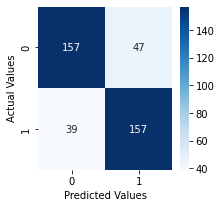

In [ ]:

# model creation
cb_mdl = CatBoostClassifier()

# tranfer the group of traing data into modeling
cb_mdl=cb_mdl.fit(X_train, y_train)

# test set predicting for the results
cb_pred = cb_mdl.predict(X_test)

# report of classification
print(classification_report(y_test, cb_pred))

# confusion matrix
cm_cb= confusion_matrix(y_test, cb_pred)
print(cm_cb)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_cb, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Multi Layer Perceptron**

In [ ]:
ann_mdl = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

ann_mdl=ann_mdl.fit(X_train, y_train )

print("training accuracy :", ann_mdl.score(X_train, y_train ))
print("testing accuracy :", ann_mdl.score(X_test, y_test))

training accuracy : 0.9366138448707256
testing accuracy : 0.7475


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.



              precision    recall  f1-score   support

           0       0.78      0.70      0.74       204
           1       0.72      0.80      0.76       196

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

[[143  61]
 [ 40 156]]


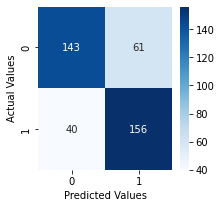

In [ ]:
ann_pred = ann_mdl.predict(X_test)

# report of classification
print(classification_report(y_test, ann_pred))

# confusion matrix
cm_ann= confusion_matrix(y_test, ann_pred)
print(cm_ann)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_ann, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Hypertuning Parameters for Best Model-CatBoost Classifier**

In [ ]:
param_grid = {
            'iterations':[100,500,1000],
            'learning_rate':[0.01,0.1,0.5],
            'depth':[3,6,10]
            }

In [ ]:
grid = GridSearchCV(estimator=CatBoostClassifier(), param_grid=param_grid, cv=5, n_jobs=1, verbose=1)
grid.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f36b4ce80a0>,
             n_jobs=1,
             param_grid={'depth': [3, 6, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.1, 0.5]},
             verbose=1)

In [ ]:
grid.best_params_

{'depth': 10, 'iterations': 500, 'learning_rate': 0.01}

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       204
           1       0.75      0.82      0.78       196

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.78      0.77       400

[[149  55]
 [ 35 161]]


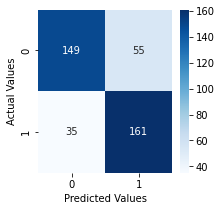

In [ ]:
cb_ht_pred = grid.predict(X_test)

# report of classification
print(classification_report(y_test, cb_ht_pred))

# confusion matrix
cm_cb_ht= confusion_matrix(y_test, cb_ht_pred)
print(cm_cb_ht)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_cb_ht, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Determing Important Features using CatBoost Classifier**

Text(0.5, 1.0, 'feature importance score')

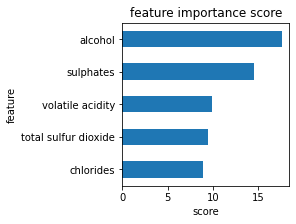

In [ ]:
#Top 5 important features
feat_importances = pnds.Series(cb_mdl.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(5).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# **Ensemble Methods**

In [ ]:
rf_mdl= RandomForestClassifier()
cb_mdl= CatBoostClassifier()
ab_mdl=AdaBoostClassifier()

clf = VotingClassifier(estimators = [('rf',rf_mdl), ('cb',cb_mdl), ('ab', ab_mdl)], voting='soft')

Learning rate set to 0.011132
0:	learn: 0.6893069	total: 2.44ms	remaining: 2.44s
1:	learn: 0.6849842	total: 5.32ms	remaining: 2.65s
2:	learn: 0.6804974	total: 8.05ms	remaining: 2.67s
3:	learn: 0.6758203	total: 11.4ms	remaining: 2.84s
4:	learn: 0.6716009	total: 14.1ms	remaining: 2.81s
5:	learn: 0.6682624	total: 16.7ms	remaining: 2.76s
6:	learn: 0.6646211	total: 20.2ms	remaining: 2.86s
7:	learn: 0.6608926	total: 23ms	remaining: 2.85s
8:	learn: 0.6571477	total: 26ms	remaining: 2.87s
9:	learn: 0.6533163	total: 30.7ms	remaining: 3.04s
10:	learn: 0.6491222	total: 33.8ms	remaining: 3.04s
11:	learn: 0.6458091	total: 36.5ms	remaining: 3.01s
12:	learn: 0.6434309	total: 39.1ms	remaining: 2.97s
13:	learn: 0.6402515	total: 41.7ms	remaining: 2.93s
14:	learn: 0.6370895	total: 44.2ms	remaining: 2.9s
15:	learn: 0.6332663	total: 46.8ms	remaining: 2.88s
16:	learn: 0.6295278	total: 49.5ms	remaining: 2.86s
17:	learn: 0.6259730	total: 52.1ms	remaining: 2.84s
18:	learn: 0.6225809	total: 54.6ms	remaining: 2.8

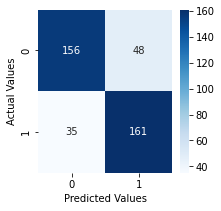

In [ ]:
clf=clf.fit(X_train, y_train)

clf_pred = clf.predict(X_test)

# report of classification
print(classification_report(y_test, clf_pred))

# confusion matrix
cm_clf= confusion_matrix(y_test, clf_pred)
print(cm_clf)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_clf, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
clf_hd = VotingClassifier(estimators = [('rf',rf_mdl), ('cb',cb_mdl), ('ab', ab_mdl)], voting='hard')

Learning rate set to 0.011132
0:	learn: 0.6893069	total: 4.21ms	remaining: 4.21s
1:	learn: 0.6849842	total: 7ms	remaining: 3.49s
2:	learn: 0.6804974	total: 9.7ms	remaining: 3.23s
3:	learn: 0.6758203	total: 12.2ms	remaining: 3.04s
4:	learn: 0.6716009	total: 14.9ms	remaining: 2.97s
5:	learn: 0.6682624	total: 17.5ms	remaining: 2.9s
6:	learn: 0.6646211	total: 20ms	remaining: 2.84s
7:	learn: 0.6608926	total: 22.5ms	remaining: 2.79s
8:	learn: 0.6571477	total: 25ms	remaining: 2.75s
9:	learn: 0.6533163	total: 27.5ms	remaining: 2.72s
10:	learn: 0.6491222	total: 30.2ms	remaining: 2.71s
11:	learn: 0.6458091	total: 32.2ms	remaining: 2.65s
12:	learn: 0.6434309	total: 34.4ms	remaining: 2.61s
13:	learn: 0.6402515	total: 36.9ms	remaining: 2.6s
14:	learn: 0.6370895	total: 39.4ms	remaining: 2.58s
15:	learn: 0.6332663	total: 41.8ms	remaining: 2.57s
16:	learn: 0.6295278	total: 44.5ms	remaining: 2.57s
17:	learn: 0.6259730	total: 47.3ms	remaining: 2.58s
18:	learn: 0.6225809	total: 50ms	remaining: 2.58s
19:	

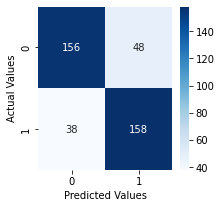

In [ ]:
clf_hd=clf_hd.fit(X_train, y_train)

clf_hd_pred = clf_hd.predict(X_test)

# report of classification
print(classification_report(y_test, clf_hd_pred))

# confusion matrix
cm_clf_hd= confusion_matrix(y_test, clf_hd_pred)
print(cm_clf_hd)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_clf_hd, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Classification with Best Features Only with CatBoost Classifier**

In [ ]:
df = wine_dataS[['alcohol','sulphates', 'volatile acidity', 'total sulfur dioxide', 'chlorides', 'quality']].copy()

# separating the variables in the data into variables of the study

X = df.iloc[:,:5]
y = df.iloc[:,5]

print(X.shape)
print(y.shape)

# separating the dataset into a training and testing group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

# separating the dataset into a training and testing group
print(X_train.shape)
print(y_train .shape)
print(X_test .shape)
print(y_test.shape)

(1599, 5)
(1599,)
(1199, 5)
(1199,)
(400, 5)
(400,)


Learning rate set to 0.011132
0:	learn: 0.6887728	total: 1.61ms	remaining: 1.61s
1:	learn: 0.6839964	total: 3.22ms	remaining: 1.61s
2:	learn: 0.6798033	total: 4.75ms	remaining: 1.58s
3:	learn: 0.6757587	total: 6.47ms	remaining: 1.61s
4:	learn: 0.6717707	total: 8.31ms	remaining: 1.65s
5:	learn: 0.6672293	total: 10ms	remaining: 1.66s
6:	learn: 0.6631394	total: 11.7ms	remaining: 1.66s
7:	learn: 0.6593982	total: 13.4ms	remaining: 1.66s
8:	learn: 0.6555005	total: 15.1ms	remaining: 1.66s
9:	learn: 0.6518525	total: 16.8ms	remaining: 1.66s
10:	learn: 0.6483105	total: 18.8ms	remaining: 1.69s
11:	learn: 0.6443528	total: 20.5ms	remaining: 1.69s
12:	learn: 0.6407133	total: 22.6ms	remaining: 1.71s
13:	learn: 0.6366374	total: 24.2ms	remaining: 1.71s
14:	learn: 0.6333050	total: 26ms	remaining: 1.71s
15:	learn: 0.6302267	total: 27.4ms	remaining: 1.68s
16:	learn: 0.6269093	total: 28.7ms	remaining: 1.66s
17:	learn: 0.6235148	total: 30.4ms	remaining: 1.66s
18:	learn: 0.6209135	total: 32ms	remaining: 1.65

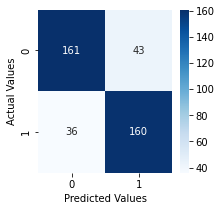

In [ ]:
# model creation
cb_mdl_fs = CatBoostClassifier()

# tranfer the group of traing data into modeling
cb_mdl_fs=cb_mdl_fs.fit(X_train, y_train)

# test set predicting for the results
cb_pred_fs = cb_mdl_fs.predict(X_test)

# report of classification
print(classification_report(y_test, cb_pred_fs))

# confusion matrix
cm_cb_fs= confusion_matrix(y_test, cb_pred_fs)
print(cm_cb_fs)

plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_cb_fs, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()